## Домашние задания

1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного спуска и  стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.
2. [\*] Добавить в алгоритм градиентного спуска L1 регуляризацию. Сравнить влияние коэффициентов регуляризации L1 и L2 на величину весов для примера из урока (лучше графически).  


In [1]:
import numpy as np
from sklearn import datasets

X_, y_, coef = datasets.make_regression(n_samples=1000, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1,
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)

In [2]:
X_.shape, X_.std(), X_.mean(), coef

((1000, 2),
 0.9882185106289078,
 0.04508414653574071,
 array([40.71064891,  6.60098441]))

In [28]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [38]:
# Метод градиентного спуска
def eval_GD(X, y, iterations, alpha=1e-3, debug = 0):
    errors = []
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X))
        if i % (iterations / 100) == 0: errors.append(err)
        if debug and i % (iterations / 10) == 0:
            print(i, w, err)
    return errors

In [39]:
errors_GD = eval_GD(X_, y_, 1000)

In [40]:
# SGD - стохастический градиентный спуск
def eval_SGD(X, y, iterations, alpha=1e-3, debug = 0):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    errors = []
    for i in range(1, iterations + 1):
        err = calc_mse(y, np.dot(X, w))
        # генерируем случайный индекс объекта выборки
        ind = np.random.randint(n)
        y_pred = np.dot(X[ind], w)
        w -= alpha * (2 * np.dot((y_pred - y[ind]), X[ind]))
        if i % (iterations / 100) == 0: errors.append(err)
        if debug and i % (iterations / 10) == 0:
            print(i, w, err)
    return errors

In [41]:
errors_SGD = eval_SGD(X_, y_, 1000)

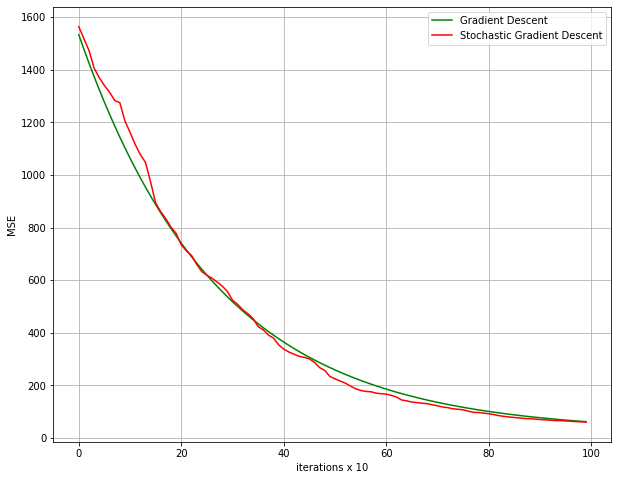

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.xlabel('iterations x 10')
plt.ylabel('MSE')
plt.plot(list(range(100)), errors_GD, color = 'green', label = 'Gradient Descent')
plt.plot(list(range(100)), errors_SGD, color = 'red', label = 'Stochastic Gradient Descent')
plt.legend(loc='upper right')
plt.grid()
plt.show()

По графикам видно, что несмотря на то, что у стохастического градиента график менее гладкий, скорость сходимости обоих алгоритмов практически не отличается. Более неравномерный график стохастического процесса объясняется тем, что градиенты определенных экземпляров выборки могут отклоняться от истинного градиента, рассчитанного по всему датасету, что приводит к тому, что движение в точку оптимума идет не по кратчайшему пути.